In [69]:
import pandas as pd
import numpy as np4
import seaborn as sns
import matplotlib.pyplot as plt
import easygui

In [70]:
path=easygui.fileopenbox()

In [72]:
df=pd.read_csv(path)

In [73]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [74]:
total=df.isna().sum().sort_values(ascending=False)
percentage=(df.isna().sum()/df.shape[0]).sort_values(ascending=False)
table=pd.concat([total,percentage],axis=1,keys=['total','percentage'])
table

,total,percentage
Serial No.,0,0.0
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
LOR,0,0.0
CGPA,0,0.0
Research,0,0.0
Chance of Admit,0,0.0


## No null values in the dataset

# 1.) Perform Exploratory Data Analysis (EDA) tasks

## a) Visualize the 10 random rows of the data set

In [75]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
375,376,304,101,2,2.0,2.5,7.66,0,0.38
209,210,301,104,3,3.5,4.0,8.12,1,0.68
93,94,301,97,2,3.0,3.0,7.88,1,0.44
80,81,312,105,3,2.0,3.0,8.02,1,0.50
156,157,315,105,3,2.0,2.5,8.34,0,0.70
481,482,323,107,4,3.0,2.5,8.48,1,0.78
469,470,326,114,4,4.0,3.5,9.16,1,0.86
432,433,324,112,4,4.5,4.0,9.22,1,0.86
14,15,311,104,3,3.5,2.0,8.20,1,0.61
419,420,308,102,2,2.0,3.5,7.98,1,0.58


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## b) Generate the description for numeric variables

In [77]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## c) Check the shape of the data set

In [78]:
df.shape

(500, 9)

## d) Generate the correlation matrix

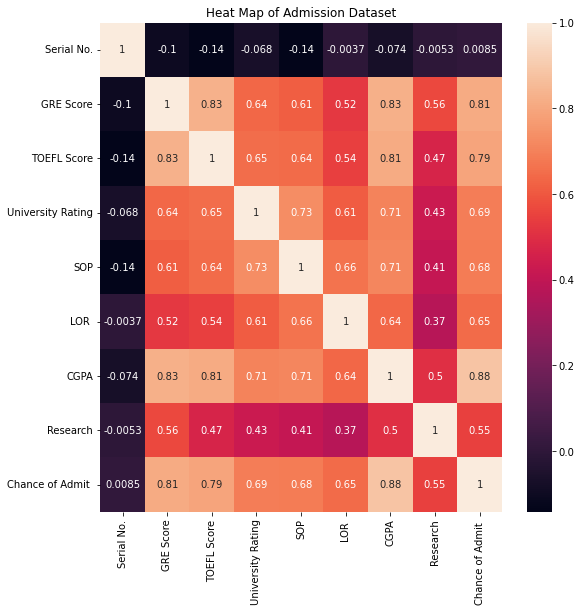

In [79]:
plt.figure(figsize=(9,9))
plt.title('Heat Map of Admission Dataset',loc='center')
sns.heatmap(df.corr(),annot=True)
plt.show()

## Here the serail no is the unique id which affects the correlation of the heat map

## so dropping the serial no from the admission dataset

In [80]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [81]:
df.drop('Serial No.',axis=1,inplace=True)

In [82]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## After dropping the serial number

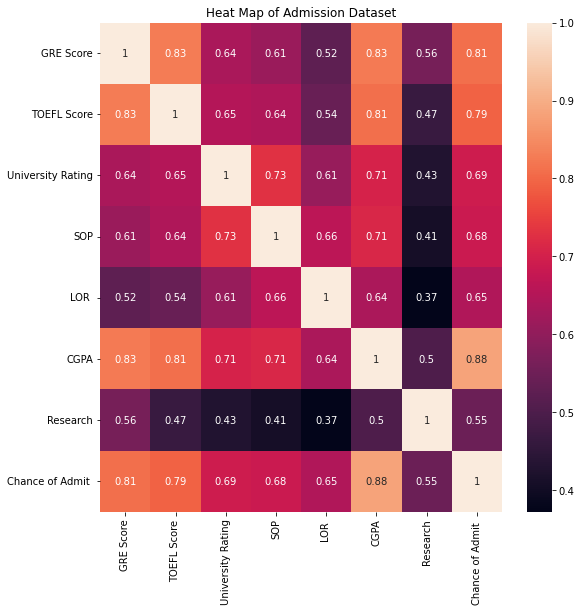

In [83]:
plt.figure(figsize=(9,9))
plt.title('Heat Map of Admission Dataset',loc='center')
sns.heatmap(df.corr(),annot=True)
plt.show()

## e) Generate a correlogram

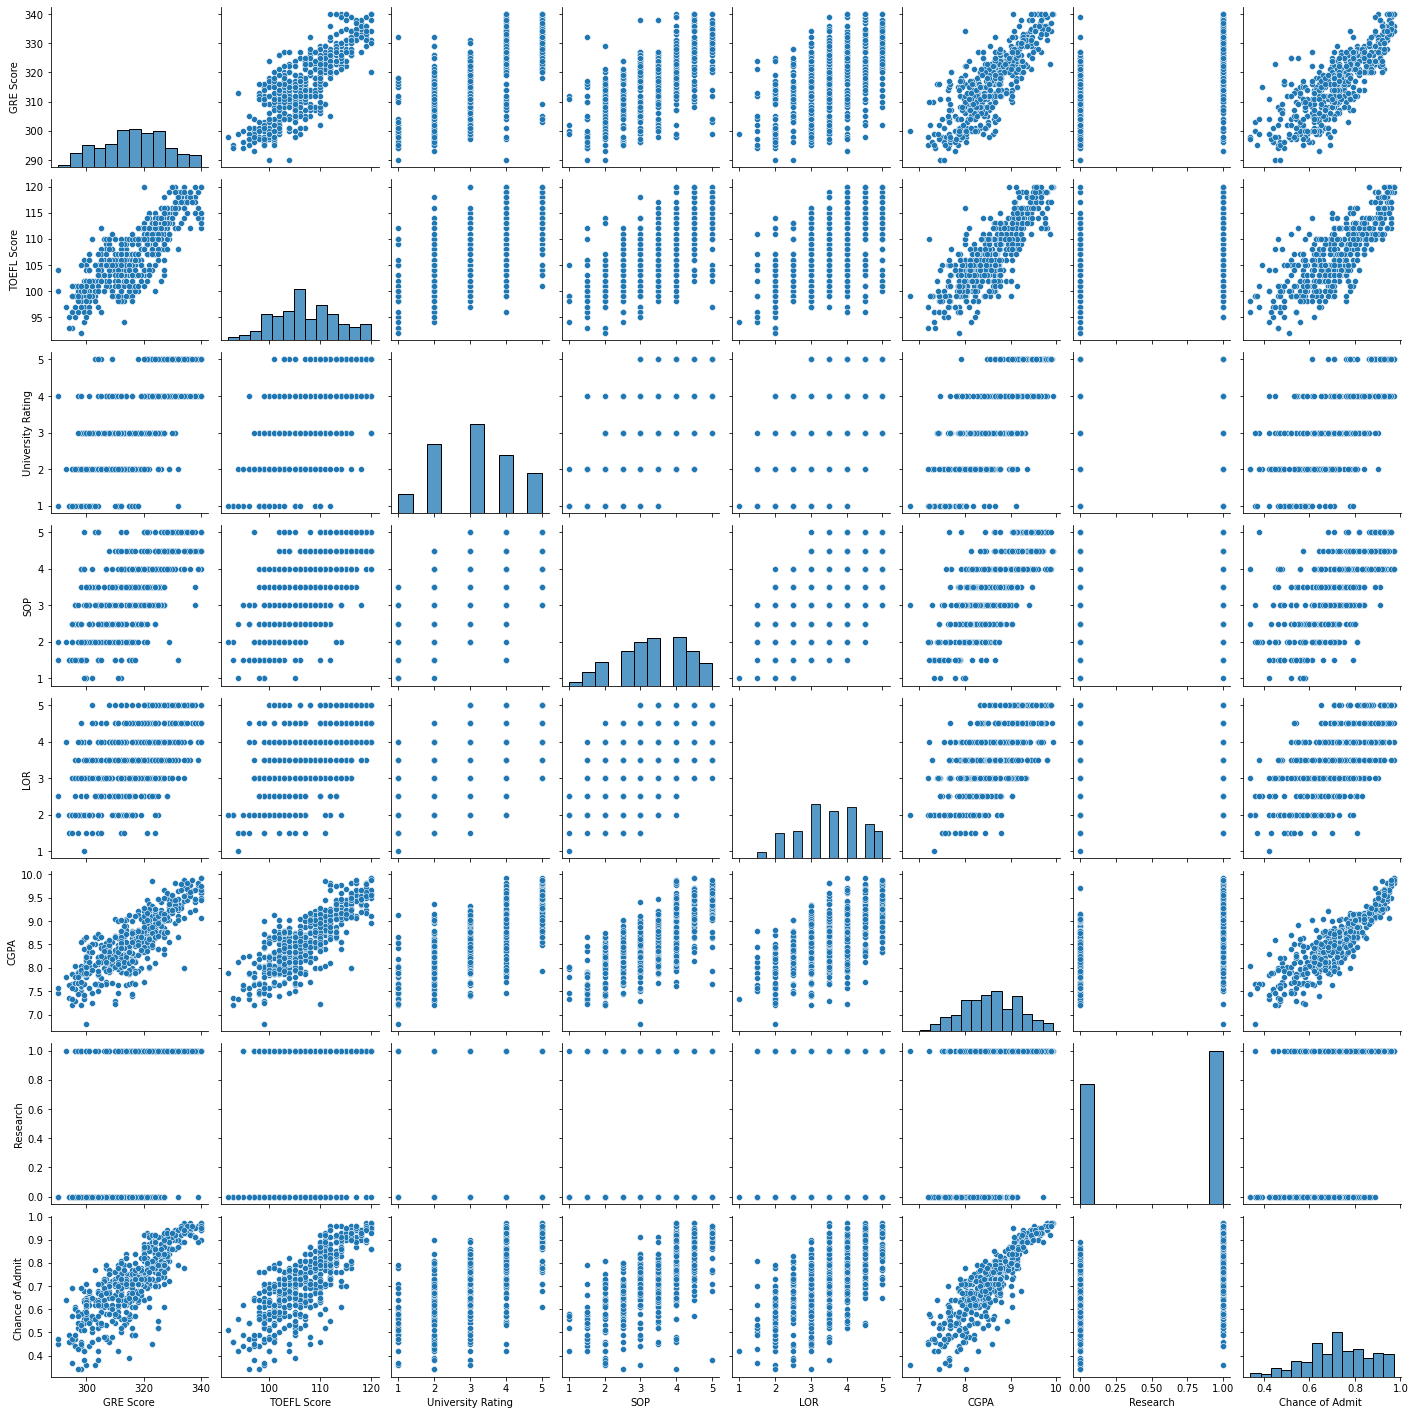

In [84]:
sns.pairplot(df)

## 2.)Find out the minimum and maximum values for GRE score

In [86]:
print('The Maximum values of GRE :',max(df['GRE Score']))

The Maximum values of GRE : 340


In [87]:
print('The Minimum values of GRE :',min(df['GRE Score']))

The Minimum values of GRE : 290


## 3.)Find out the percentage of universities for each university rating

In [88]:
(df['University Rating'].value_counts()/df.shape[0])*100

3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64

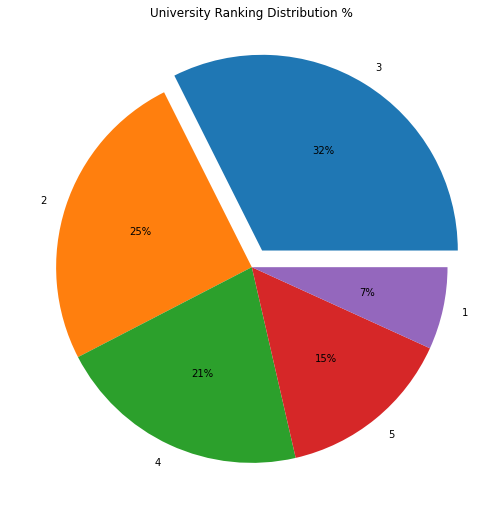

In [89]:
plt.figure(figsize=(9,9))
color=sns.color_palette('bright')
plt.title('University Ranking Distribution %')
explode=[0.1,0,0,0,0]
plt.pie(df['University Rating'].value_counts().values,labels=df['University Rating'].value_counts().index,explode=explode,autopct='%.0f%%')
plt.show()

## 4.)Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :

In [90]:
df['Chance of Admit '].value_counts()

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance of Admit , Length: 61, dtype: int64

In [91]:
new=[]
for i in df['Chance of Admit ']:
    if i > 0.80:
        new.append(1)
    else:
        new.append(0)

In [92]:
data=pd.DataFrame(new)

In [93]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [94]:
df['Chance of Admit ']=data

In [95]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


In [96]:
df['Chance of Admit '].value_counts()

0    358
1    142
Name: Chance of Admit , dtype: int64

In [97]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


## 0-> low chance of admission
## 1-> high chance of admission

In [100]:
x=df.iloc[:,:-1]

In [101]:
y=df.iloc[:,-1]

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [104]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x.shape)
print(y.shape)

(350, 7)
(350,)
(150, 7)
(150,)
(500, 7)
(500,)


## 5.)Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
model=DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_leaf = 5)

In [107]:
fit=model.fit(x_train,y_train)

In [108]:
predict=fit.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test,predict)

0.9533333333333334

## Hyperparameter Tuning

In [112]:
model_1=DecisionTreeClassifier(criterion = "gini", max_depth = 3, min_samples_leaf = 5)

In [113]:
fit_1=model_1.fit(x_train,y_train)

In [114]:
predict_1=fit_1.predict(x_test)

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [116]:
accuracy_score(y_test,predict_1)

0.96

## so here we conclude the acccurarcy for gini we are getting more compared with entrophy

## 6.)Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
Rf_model=RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                min_samples_split = 10, min_samples_leaf = 9, max_features = "auto",
                                random_state = 42, max_depth = 12)

In [120]:
Rf_fit=Rf_model.fit(x_train,y_train)

In [121]:
Rf_predict=Rf_fit.predict(x_test)

In [122]:
accuracy_score(y_test,Rf_predict)

0.9666666666666667

In [123]:
y_prob=Rf_fit.predict_proba(x_test)

In [126]:
confusion_matrix(y_test,Rf_predict)

array([[107,   2],
       [  3,  38]], dtype=int64)

In [128]:
y_predicted = y_prob[:,1]

In [129]:
print(y_predicted)

[9.48646873e-01 4.20086326e-01 3.84403037e-03 6.13741957e-02
 4.96366625e-01 9.40336871e-01 1.93650794e-03 3.28275392e-02
 4.39744902e-01 3.75223391e-01 9.90485921e-02 9.49757514e-02
 8.62237700e-02 9.93126948e-01 5.54133989e-01 1.22222222e-03
 6.55562318e-01 0.00000000e+00 1.93650794e-03 5.84831155e-03
 1.09641244e-02 2.34420818e-02 6.32571136e-02 2.42586220e-01
 2.00286745e-01 2.30000000e-03 9.99444444e-01 8.61669501e-01
 1.87500000e-03 1.90534001e-01 8.33333333e-04 1.33801224e-01
 2.21428571e-03 8.77860947e-01 5.45421607e-03 6.54610791e-02
 0.00000000e+00 1.00000000e+00 1.06390889e-02 7.61734373e-02
 9.76895997e-01 0.00000000e+00 0.00000000e+00 8.28606816e-01
 9.69546552e-01 1.50000000e-03 9.84076302e-01 6.38436246e-01
 2.97971812e-01 9.86413400e-01 9.30417468e-01 0.00000000e+00
 6.93665864e-02 0.00000000e+00 9.96934641e-01 5.15417576e-02
 9.48646873e-01 1.58953617e-01 6.73510507e-03 2.30000000e-03
 4.58758170e-03 5.84831155e-03 0.00000000e+00 5.17813770e-02
 1.22222222e-03 2.666391

In [130]:
Rf_model_1=RandomForestClassifier(n_estimators = 100, criterion = 'gini', 
                                min_samples_split = 10, min_samples_leaf = 9, max_features = "auto",
                                random_state = 42, max_depth = 12)

In [131]:
Rf_fit_1=Rf_model_1.fit(x_train,y_train)

In [132]:
Rf_predict_1=Rf_fit_1.predict(x_test)

In [133]:
accuracy_score(y_test,Rf_predict_1)

0.96

In [134]:
confusion_matrix(y_test,Rf_predict_1)

array([[106,   3],
       [  3,  38]], dtype=int64)

In [135]:
y_prob_1=Rf_fit_1.predict_proba(x_test)

In [136]:
y_predicted_1 = y_prob_1[:,1]

In [137]:
print(y_predicted_1)

[9.34441254e-01 4.58684244e-01 6.95270416e-03 4.99170870e-02
 5.28272028e-01 9.40000201e-01 1.93650794e-03 3.66223920e-02
 4.29255168e-01 3.71935282e-01 9.92343114e-02 7.48789383e-02
 1.19231016e-01 9.93386011e-01 5.26858438e-01 1.22222222e-03
 6.99651435e-01 0.00000000e+00 1.93650794e-03 4.20370370e-03
 8.31110041e-03 3.20553371e-02 6.40491969e-02 2.29890432e-01
 2.17314934e-01 7.14285714e-04 9.96807845e-01 8.59677907e-01
 0.00000000e+00 1.70490147e-01 1.60256410e-03 1.12575705e-01
 1.42857143e-03 8.40467243e-01 3.57575758e-03 5.94421798e-02
 0.00000000e+00 9.98373016e-01 7.16041366e-03 7.41419134e-02
 9.75048204e-01 0.00000000e+00 0.00000000e+00 8.50079315e-01
 9.71108389e-01 0.00000000e+00 9.85904128e-01 6.47583559e-01
 2.97853596e-01 9.82207531e-01 8.93420639e-01 0.00000000e+00
 8.28905081e-02 2.08333333e-03 9.96256374e-01 6.47711023e-02
 9.34441254e-01 1.39056036e-01 7.79761905e-03 7.14285714e-04
 4.12774725e-03 2.87037037e-03 0.00000000e+00 5.42289995e-02
 1.22222222e-03 2.899090

## accuracy for Random forest (entrophy) = 0.96666667
## accuracy for Random forest (entrophy) = 0.96